In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
import datetime as dt

%matplotlib inline

In [ ]:
#process
df = pd.read_csv("/content/sample_data/netflix1.csv")

In [ ]:
df


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.drop_duplicates(subset="show_id", keep=False,inplace=True)

In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [ ]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [ ]:
#ANALYSE
df['month_added']=df['date_added'].dt.month_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June


In [ ]:
df['year_added']=df['date_added'].dt.year
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018


In [ ]:
df['day_added']=df['date_added'].dt.day_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [ ]:
#group by type
types = df.groupby(['type'])['type'].count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6126
TV Show,2664


In [ ]:
#group by director and type
show_director = df.groupby(['type','director'])['director'].count().reset_index(name='show_count')
show_director

,type,director,show_count
0,Movie,A. L. Vijay,2
1,Movie,A. Raajdheep,1
2,Movie,A. Salaam,1
3,Movie,A.R. Murugadoss,2
4,Movie,Aadish Keluskar,1
...,...,...,...
4576,TV Show,Vijay S. Bhanushali,1
4577,TV Show,"Vikramaditya Motwane, Anurag Kashyap",1
4578,TV Show,Wouter Bouvijn,1
4579,TV Show,Yasuhiro Irie,1


In [ ]:
#Top 10 Director
top_10_director = show_director.query("`show_count`>=12")
top_10_director

,type,director,show_count
661,Movie,Cathy Garcia-Molina,13
1713,Movie,Jay Chapman,12
1716,Movie,Jay Karas,14
2492,Movie,Marcus Raboy,15
2562,Movie,Martin Scorsese,12
2946,Movie,Not Given,173
3253,Movie,Rajiv Chilaka,19
3304,Movie,"Raúl Campos, Jan Suter",18
3886,Movie,Suhas Kadav,16
4307,Movie,Youssef Chahine,12


In [ ]:
#groupby country in type
show_origin=df.groupby(['country','type'])['country'].count().reset_index(name='show_count')
show_origin

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [ ]:
#top 20 country
top_20_country= show_origin.query("`show_count` >=81")
top_20_country

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [ ]:
#groupby listed_in and type
show_genre = df.groupby(['listed_in','type'])['listed_in'].count().reset_index(name='show_genre_count')
show_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [ ]:
#top 20 genre
top_20_genre = show_genre.query(" `show_genre_count`>=110")
top_20_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
39,"Action & Adventure, Dramas, International Movies",Movie,132
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
184,Comedies,Movie,110
198,"Comedies, Dramas, Independent Movies",Movie,116
199,"Comedies, Dramas, International Movies",Movie,274
216,"Comedies, International Movies",Movie,176
219,"Comedies, International Movies, Romantic Movies",Movie,152
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110


In [ ]:
show_rating = df.groupby(['rating','type'])['rating'].count().reset_index(name='show_rating_count')

show_rating=show_rating.set_index('rating')
show_rating

,type,show_rating_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,4
PG,Movie,287
PG-13,Movie,490
R,Movie,797
R,TV Show,2
TV-14,Movie,1427


In [ ]:
#rating of tv shows
tv_shows_rating=df.groupby(['rating','type'])['rating'].count().reset_index(name='rating_count')
tv_shows_rating=tv_shows_rating.set_index('rating')
tv_shows_rating

filter=tv_shows_rating["type"]=="TV Show"

tv_shows_rating=tv_shows_rating[filter]
tv_shows_rating=tv_shows_rating.dropna()
tv_shows_rating


,type,rating_count
rating,,
NR,TV Show,4
R,TV Show,2
TV-14,TV Show,730
TV-G,TV Show,94
TV-MA,TV Show,1143
TV-PG,TV Show,321
TV-Y,TV Show,175
TV-Y7,TV Show,194
TV-Y7-FV,TV Show,1


In [ ]:
#filter by type=tv shows
rating_movie = df.groupby(['rating','type'])['rating'].count().reset_index(name='rating_count')
rating_movie=rating_movie.set_index('rating')

filter=rating_movie['type']=='Movie'

rating_movie=rating_movie[filter]
rating_movie=rating_movie.dropna()
rating_movie

,type,rating_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
PG,Movie,287
PG-13,Movie,490
R,Movie,797
TV-14,Movie,1427
TV-G,Movie,126
TV-MA,Movie,2062


In [ ]:
#duration by type
dsc = df.groupby(['duration','type'])['type'].count().reset_index(name='dsc')
dsc
dsc.sort_values(by=['type'],ascending=False)

,duration,type,dsc
0,1 Season,TV Show,1791
25,12 Seasons,TV Show,2
208,9 Seasons,TV Show,9
196,8 Seasons,TV Show,17
185,7 Seasons,TV Show,23
...,...,...,...
86,171 min,Movie,7
87,172 min,Movie,4
88,173 min,Movie,6
89,174 min,Movie,2


In [ ]:
#group by month_added and type
release_month = df.groupby(['month_added','type'])['type'].count().reset_index(name='release_month')
release_month

,month_added,type,release_month
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


In [ ]:
#group by release_year by type
release_year = df.groupby(['year_added','type'])['type'].count().reset_index(name='release_year')
release_year

,year_added,type,release_year
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [ ]:
#release day by type
release_day = df.groupby(['day_added','type'])['type'].count().reset_index(name='release_day')
release_day

,day_added,type,release_day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


Text(0.5, 1.0, 'types_of_show')

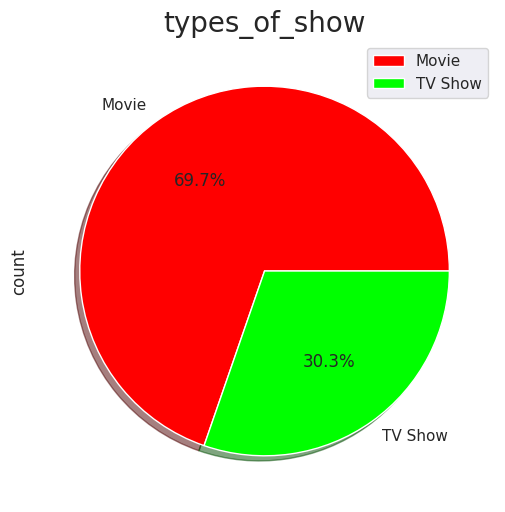

In [ ]:
#share
# percentage of types of show
colors = ['#ff0000','#00ff00']
types.plot.pie(y='count',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('types_of_show', fontsize=20)

A comparison pie chart representing the growth of Netflix movie uploads and TV show uploads between 2008 and 2021 demonstrates a substantial 39.4% increase in movie uploads


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Egypt'),
  Text(2, 0, 'France'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Nigeria'),
  Text(8, 0, 'Not Given'),
  Text(9, 0, 'Pakistan'),
  Text(10, 0, 'South Korea'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Turkey'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

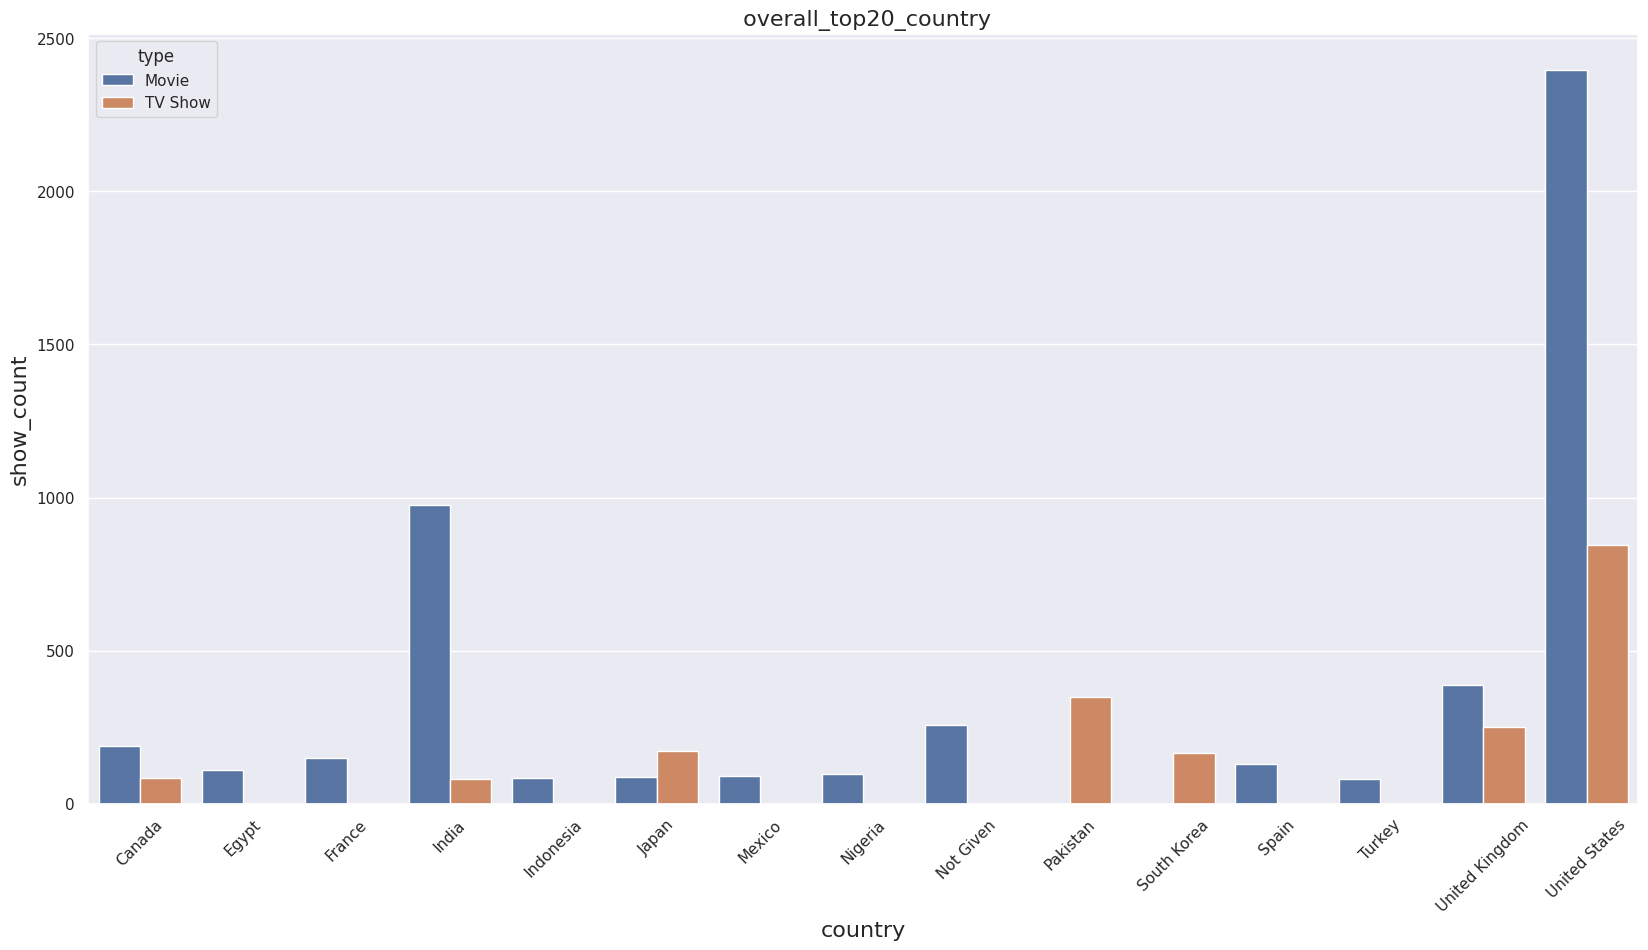

In [ ]:
sns.barplot(x =top_20_country.reset_index()['country'], y=top_20_country.reset_index()['show_count'],
            hue =  top_20_country.reset_index()['type']);
plt.title(' overall_top20_country', fontsize=16)
plt.xlabel('country', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)



The Netflix library boasts the largest collection of movies from the United States, ranking first, followed by India in second place, and the United Kingdom in third. Similarly, for TV episodes, the United States claims the top position, while Pakistan secures the second spot, and the United Kingdom takes the third position.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action & Adventure'),
  Text(1, 0, 'Action & Adventure, Dramas, International Movies'),
  Text(2, 0, 'Children & Family Movies'),
  Text(3, 0, 'Children & Family Movies, Comedies'),
  Text(4, 0, 'Comedies'),
  Text(5, 0, 'Comedies, Dramas, Independent Movies'),
  Text(6, 0, 'Comedies, Dramas, International Movies'),
  Text(7, 0, 'Comedies, International Movies'),
  Text(8, 0, 'Comedies, International Movies, Romantic Movies'),
  Text(9, 0, 'Crime TV Shows, International TV Shows, TV Dramas'),
  Text(10, 0, 'Documentaries'),
  Text(11, 0, 'Documentaries, International Movies'),
  Text(12, 0, 'Dramas'),
  Text(13, 0, 'Dramas, Independent Movies, International Movies'),
  Text(14, 0, 'Dramas, International Movies'),
  Text(15, 0, 'Dramas, International Movies, Romantic Movies'),
  Text(16, 0, 'Dramas, International Movies, Thrillers'),
  Text(17, 0, 'International TV Shows, TV D

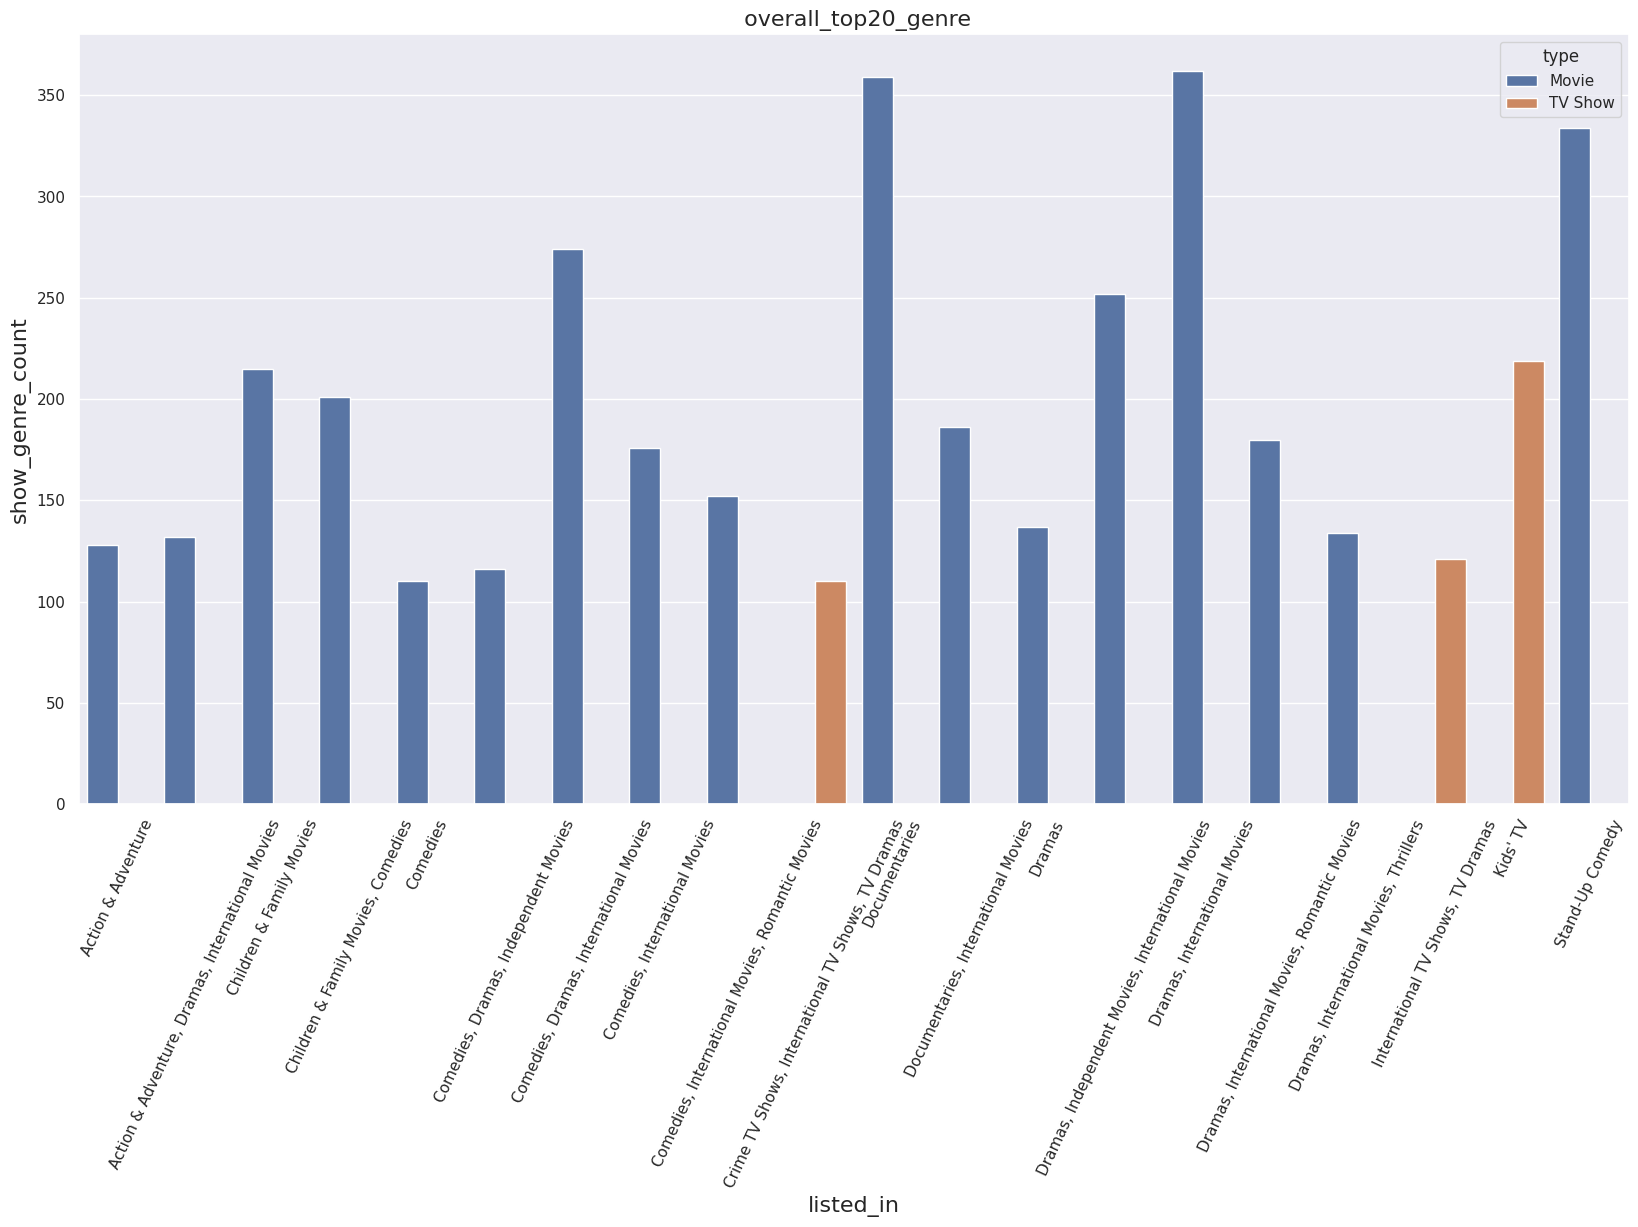

In [ ]:
sns.barplot(x =top_20_genre.reset_index()['listed_in'], y=top_20_genre.reset_index()['show_genre_count'],
            hue =  top_20_genre.reset_index()['type']);
plt.title(' overall_top20_genre', fontsize=16)
plt.xlabel('listed_in', fontsize=16);
plt.ylabel('show_genre_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 65)

Based on the analysis of the overall top 20 genres, it is evident that Netflix excels in the "Dramas, International Movies" category, securing the top position. In second place, we find "Crime TV Shows" and "International TV Shows," closely followed by "TV Dramas." Furthermore, the barchart highlights "Stand-Up Comedy" as the third most popular genre on the platform.

One significant finding from the data is that a substantial portion of Netflix's content is dedicated to kids' TV programs, indicating a strong focus on providing entertainment for young audiences.

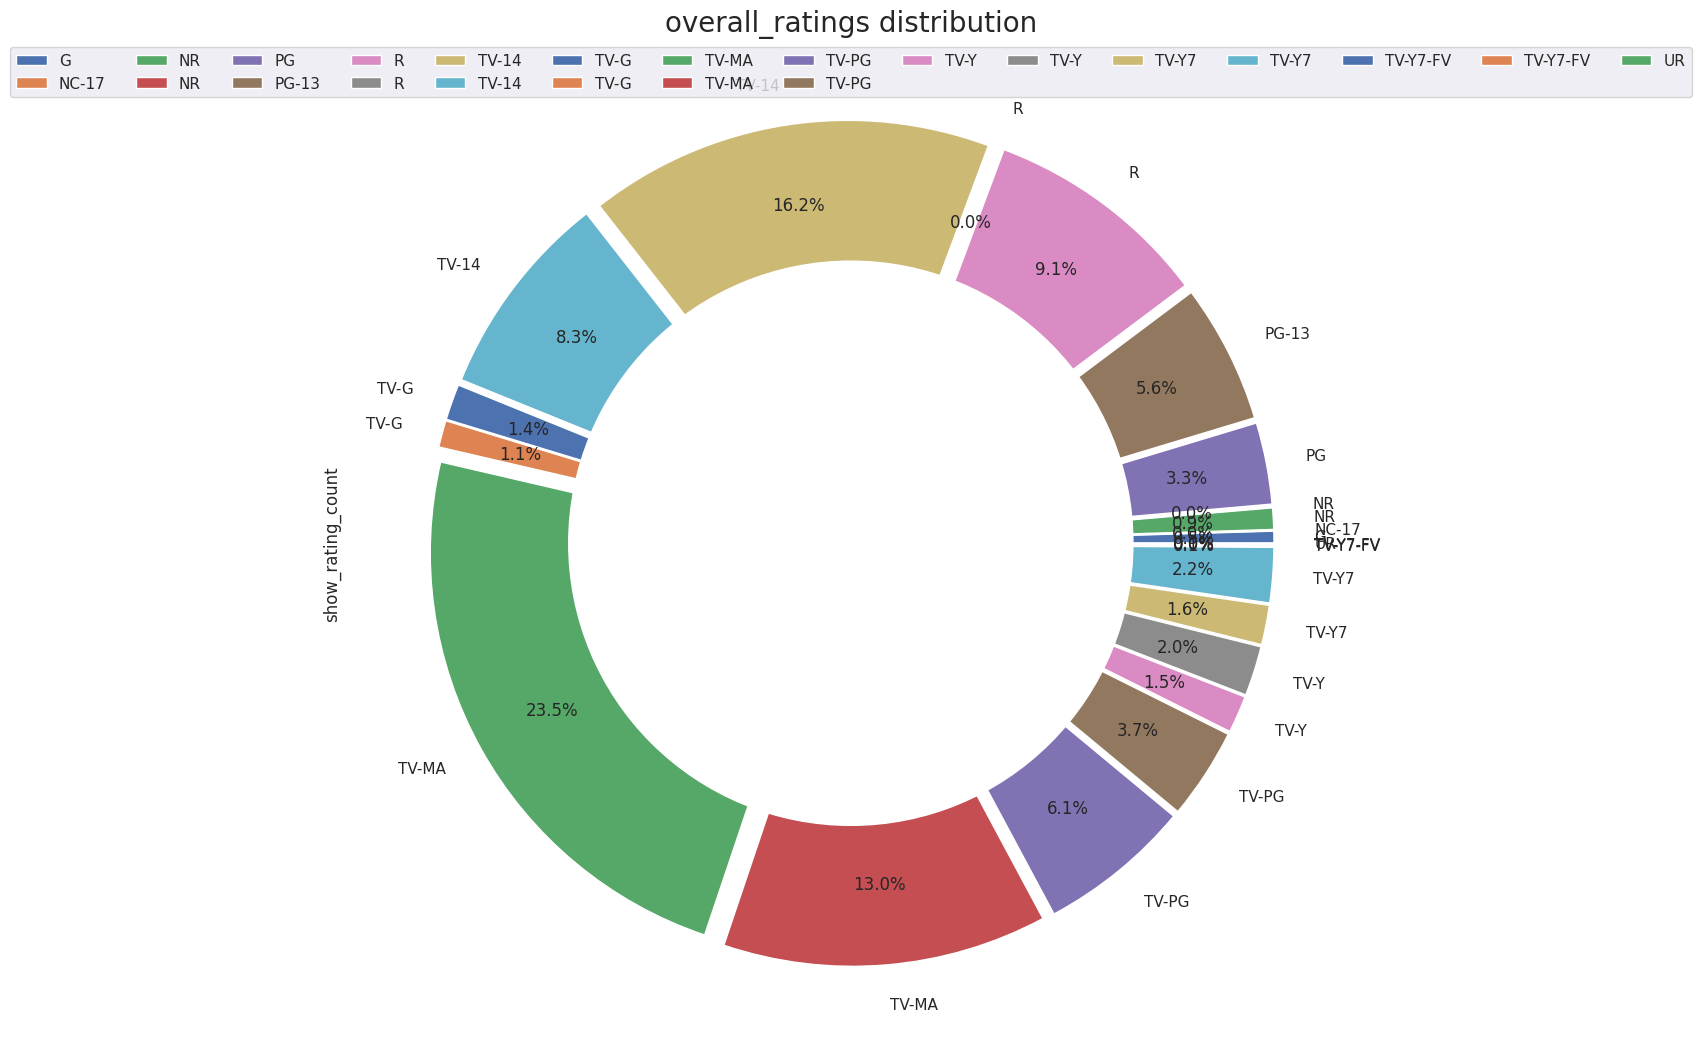

In [ ]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='show_rating_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

According to the overall rating distribution donut chart, it becomes evident that a significant portion, accounting for 36.5% of the shows, holds the TV-MA rating. This observation indicates that a considerable majority of the shows on Netflix are intended for mature audiences. The TV-14 rating comes in second place in terms of frequency.

Furthermore, the chart reveals that shows with "Parental Guidelines" and "R" ratings secure the third spot. The "R" classification signifies that the content is not appropriate for minors due to the presence of violent, offensive language, or sexually explicit material. This data provides valuable insights into the age appropriateness and audience targeting of the shows available on the platform

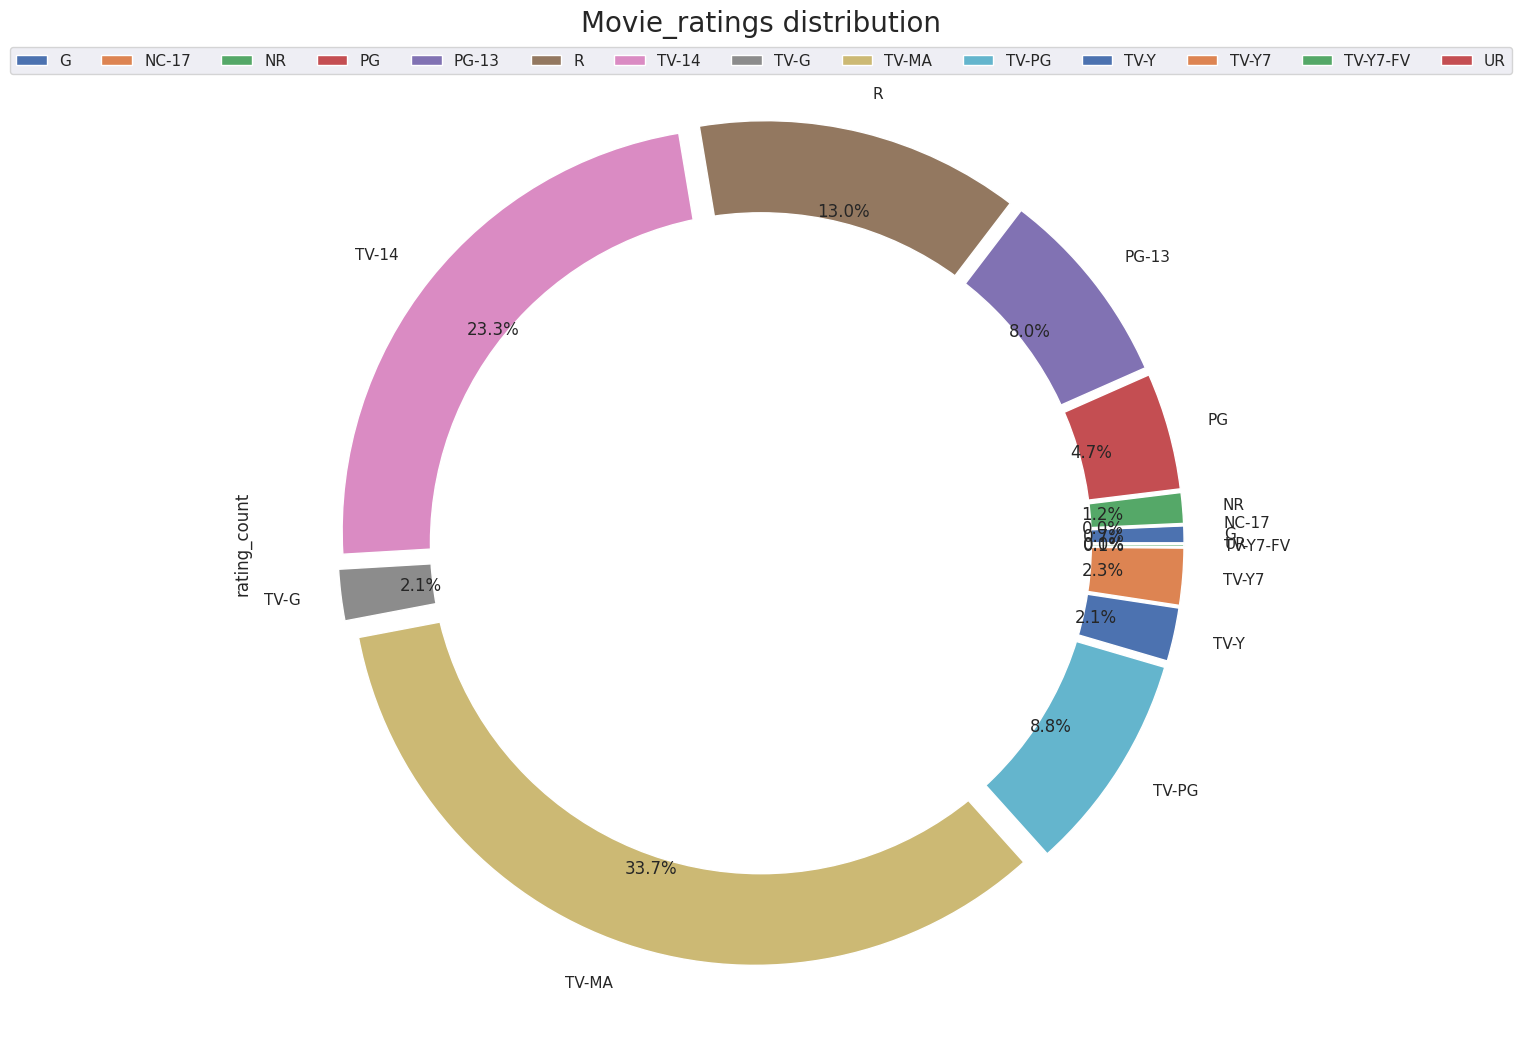

In [ ]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )
rating_movie.plot.pie(y='rating_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('Movie_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

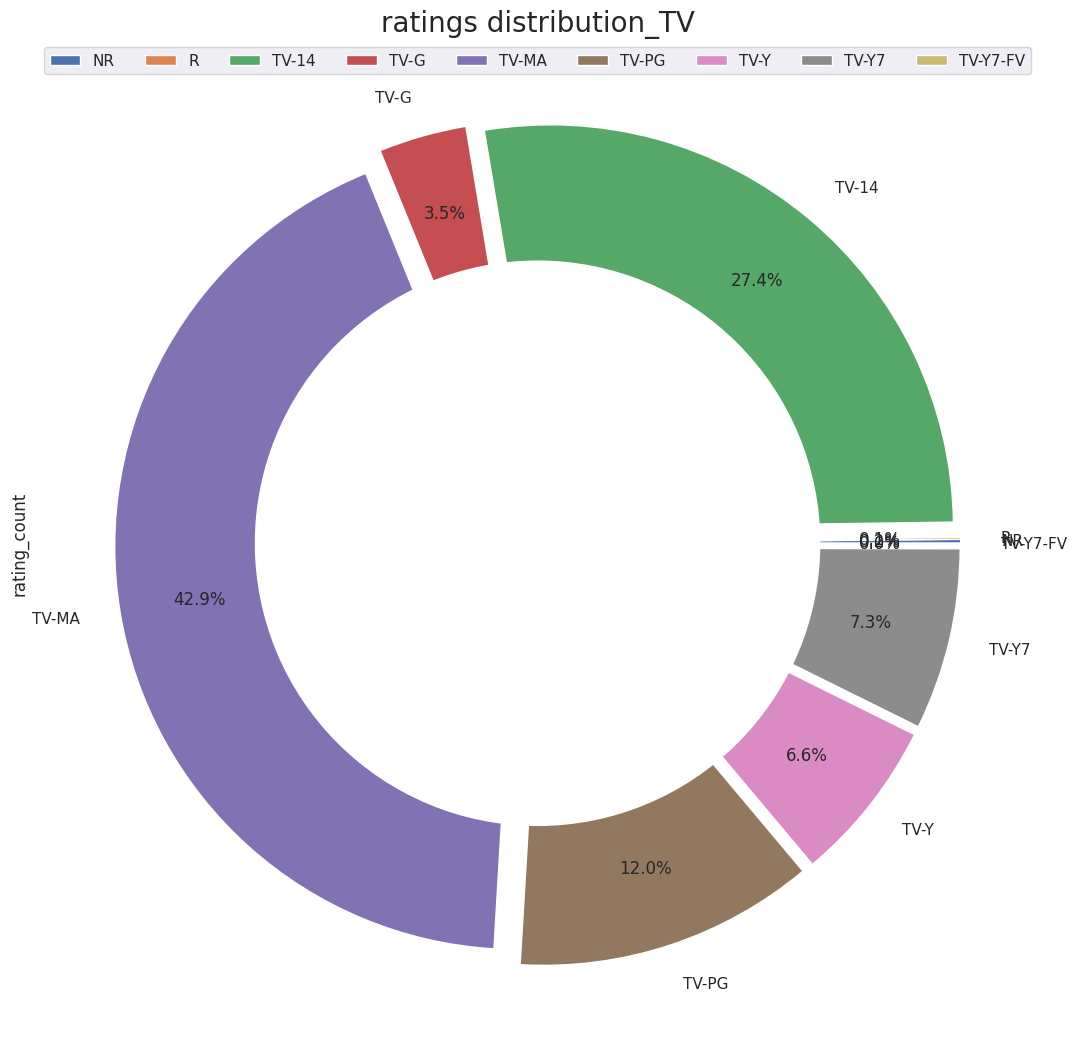

In [ ]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,)
tv_shows_rating.plot.pie(y='rating_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('ratings distribution_TV', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

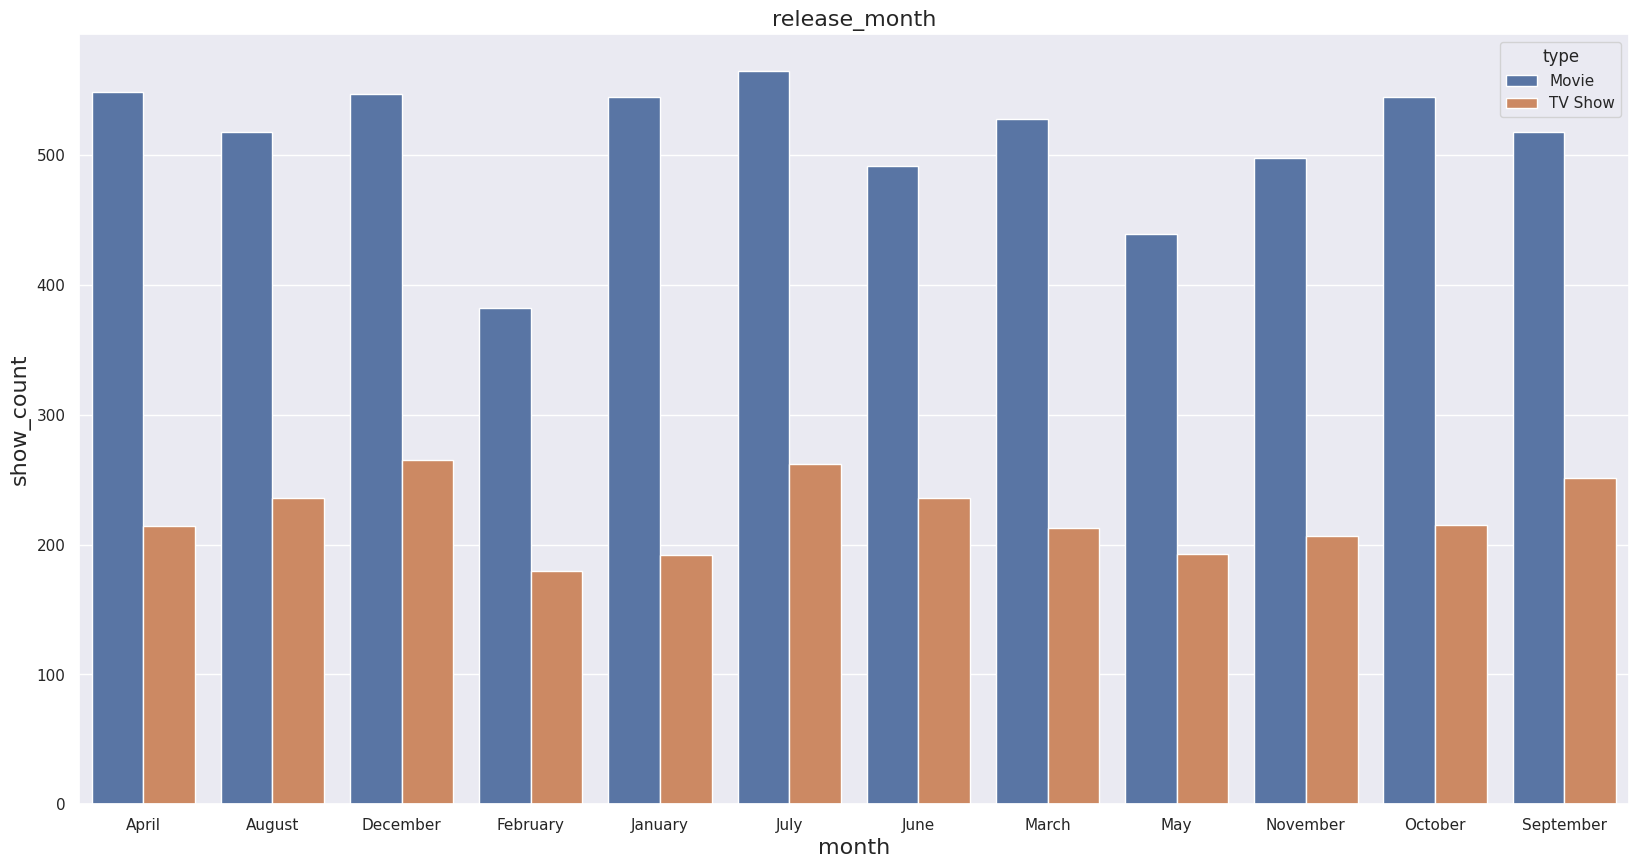

In [ ]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

The release month barchart indicates that Netflix routinely releases new shows throughout the year.

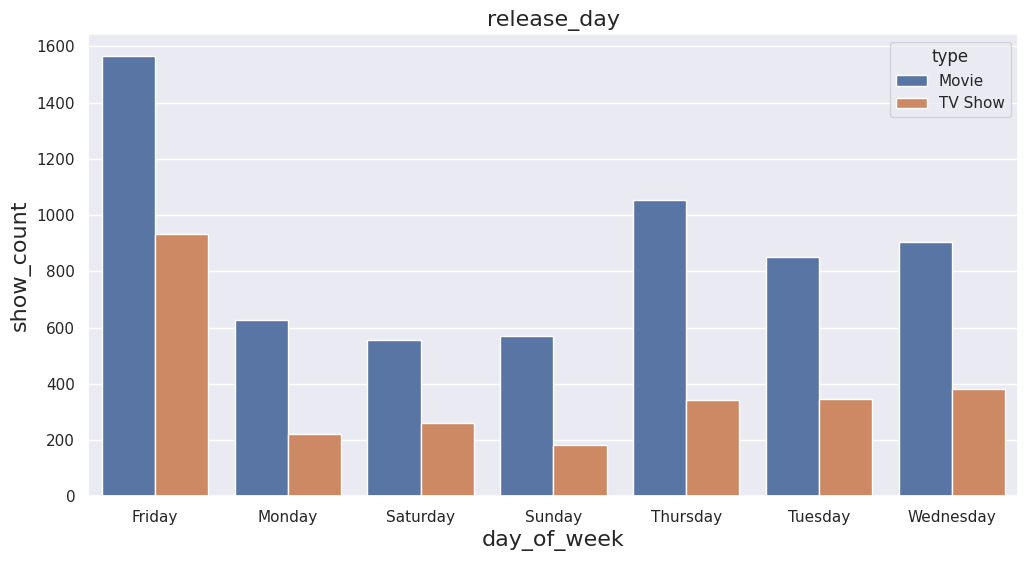

In [ ]:
sns.barplot(x =release_day.reset_index()['day_added'], y= release_day.reset_index()['release_day'],
            hue =  release_day.reset_index()['type']);
plt.title('release_day' , fontsize=16)
plt.xlabel('day_of_week', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

The majority of the shows on Netflix are released on Friday, as can be seen in the release day barchart.